In [1]:
#Modellling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error , r2_score ,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression ,Ridge, Lasso 
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("stud.csv")

In [3]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
x = df.drop("math_score" , axis = 1)
y = df["math_score"]

In [5]:
x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [6]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [7]:
#Create Column Transformer With 3 TYPE OF TRANSFORMERS

In [8]:
print("Categories in parental_level_of_education variable" , end = " ")
print(df["parental_level_of_education"].unique())
print("Categories in race_ethnicity variable" , end = " ")
print(df["race_ethnicity"].unique())
print("Categories in gender variable" , end = " ")
print(df["gender"].unique())
print("Categories in  lunch" , end = " ")
print(df["lunch"].unique())
print("Categories in test_preparation_course " , end = " ")
print(df["test_preparation_course"].unique())

Categories in parental_level_of_education variable ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in race_ethnicity variable ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in gender variable ['female' 'male']
Categories in  lunch ['standard' 'free/reduced']
Categories in test_preparation_course  ['none' 'completed']


In [9]:
# IN THIS NORMAL CATEGORICAL FEATURE SO USE OHE .
# MANY MANY CATEGORIES FEATURE TARGET GUIDANCE ORDINAL FEATURE 

In [11]:
#Creatte a Pipeline 
num_features = x.select_dtypes(exclude = "object").columns
cat_features = x.select_dtypes(include = "object").columns
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
preprocessor = ColumnTransformer([
    ("OneHotEncoder" , oh_transformer , cat_features),
    ("StandardScaler" ,numeric_transformer ,num_features)
])

In [12]:
x = preprocessor.fit_transform(x)
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.3 , random_state = 42)

In [15]:
x_train.shape , x_test.shape

((700, 19), (300, 19))

In [16]:
# Create an Evaluate Function to give all metrics after model Trainning.
def evaluate_model(true , predicted):
    mae = mean_absolute_error(true , predicted)
    mse = mean_squared_error(true , predicted)
    rmse = np.sqrt(mean_squared_error(true , predicted))
    r2 = r2_score(true , predicted)
    return mae , mse , rmse , r2_score 

In [17]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regresssor" : CatBoostRegressor(verbose = False),
    "AdaBoost Regressor" : AdaBoostRegressor()    
}
model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train , y_train) #Train Model
    #Make Prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define your evaluate_model function
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

# Your model dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Lists to hold model results
model_list = []
train_rmse_list = []
test_rmse_list = []
train_r2_list = []
test_r2_list = []

# Loop over models
for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test Data
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
    
    # Store results
    model_list.append(name)
    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)
    
    # Print results
    print(f"Model: {name}")
    print(f"Training Set - RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}")
    print(f"Test Set - RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")
    print("=" * 40)

# Create DataFrame with all the results
results_df = pd.DataFrame({
    "Model Name": model_list,
    "Train RMSE": train_rmse_list,
    "Test RMSE": test_rmse_list,
    "Train R²": train_r2_list,
    "Test R²": test_r2_list
})

# Sort by Test R² in descending order for the best models
results_df = results_df.sort_values(by="Test R²", ascending=False)

# Display the sorted DataFrame
print(results_df)


Model: Linear Regression
Training Set - RMSE: 5.2507, R²: 0.8750
Test Set - RMSE: 5.5692, R²: 0.8753
Model: Lasso
Training Set - RMSE: 6.5106, R²: 0.8078
Test Set - RMSE: 6.8705, R²: 0.8103
Model: Ridge
Training Set - RMSE: 5.2487, R²: 0.8751
Test Set - RMSE: 5.5566, R²: 0.8759
Model: K-Neighbors Regressor
Training Set - RMSE: 5.6784, R²: 0.8538
Test Set - RMSE: 7.5231, R²: 0.7725
Model: Decision Tree
Training Set - RMSE: 0.2988, R²: 0.9996
Test Set - RMSE: 8.2813, R²: 0.7244
Model: Random Forest Regressor
Training Set - RMSE: 2.3306, R²: 0.9754
Test Set - RMSE: 6.1285, R²: 0.8490
Model: XGBRegressor
Training Set - RMSE: 0.8957, R²: 0.9964
Test Set - RMSE: 6.8427, R²: 0.8118
Model: CatBoosting Regressor
Training Set - RMSE: 2.9221, R²: 0.9613
Test Set - RMSE: 6.0661, R²: 0.8521
Model: AdaBoost Regressor
Training Set - RMSE: 5.8574, R²: 0.8445
Test Set - RMSE: 6.4364, R²: 0.8335
                Model Name  Train RMSE  Test RMSE  Train R²   Test R²
2                    Ridge    5.248655 

# Linear Regression

In [19]:
lin_model = LinearRegression(fit_intercept = True)
lin_model = lin_model.fit(x_train , y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test , y_pred)*100
print("Accuracy of The Model is  %.2f" %score)

Accuracy of The Model is  87.53


# Plot Y_pred and y_test

Text(0, 0.5, 'Predicted')

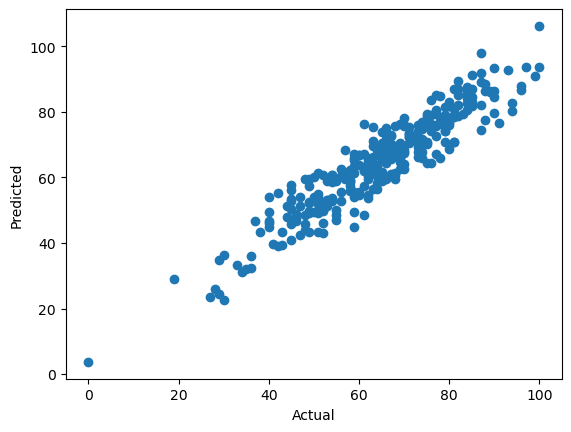

In [20]:
plt.scatter(y_test , y_pred);
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math_score'>

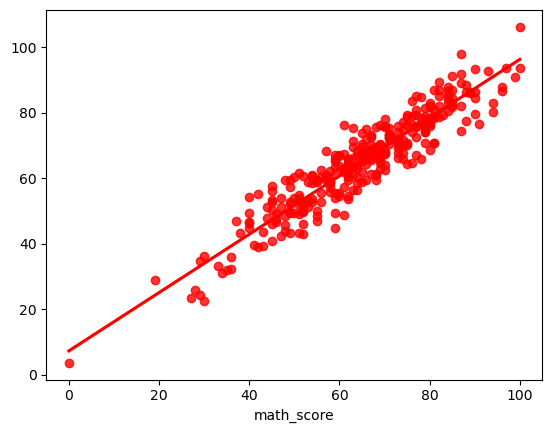

In [21]:
sns.regplot(x = y_test , y = y_pred ,  ci = None , color = "red")

In [22]:
# Difference Between ACTUAL AND Predicted Values 
pred_df = pd.DataFrame({"Actual Value" : y_test , "Predicted Value" : y_pred , "Difference" : y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.59375,14.40625
737,53,58.93750,-5.93750
740,80,77.12500,2.87500
660,74,77.03125,-3.03125
411,84,87.71875,-3.71875
...,...,...,...
468,77,72.59375,4.40625
935,70,62.62500,7.37500
428,65,58.84375,6.15625
7,40,44.96875,-4.96875
